# Lyapunov v2.0

This notebook is for identifying where the lyapunov exponent changes sign to a high accuracy.

In [1]:
from modules.helper import *
import modules.lyapunov as lyp
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1

In [2]:
import modules.lyapunov as lyp
%autoreload
x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
l = np.arange(0.1,0.9,0.1)
a = np.arange(0.7,2,0.1)

n_transient = 100
n_attractor = 100
x,y,l,a = np.meshgrid(x,y,l,a)


system = lyp.system(x,y,l,a,n_transient,n_attractor)

Iterating over the transient of 100 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 100 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point


H:\chaos\modules\lyapunov.py:44: RuntimeWarning: overflow encountered in power
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1
H:\chaos\modules\lyapunov.py:43: RuntimeWarning: invalid value encountered in multiply
  z = self.x + self.y*1j
H:\chaos\modules\lyapunov.py:44: RuntimeWarning: invalid value encountered in true_divide
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1
H:\chaos\modules\lyapunov.py:51: RuntimeWarning: overflow encountered in square
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
H:\chaos\modules\lyapunov.py:51: RuntimeWarning: invalid value encountered in multiply
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
H:\chaos\modules\lyapunov.py:51: RuntimeWarning: invalid value encountered in subtract
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*

System set up for analysis


H:\chaos\modules\lyapunov.py:57: RuntimeWarning: invalid value encountered in true_divide
  J[...,1,1] = 2*x*y**2*a*l*(x**2+y**2)**(a/2-2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2)-4*y**2*x/(x**2+y**2)**2)


In [3]:
system.calcLyapunov()

Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating


C:\Users\hjel867\AppData\Local\Continuum\anaconda3\envs\Antarctica\lib\site-packages\numpy\linalg\linalg.py:2125: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 0.60 seconds to run


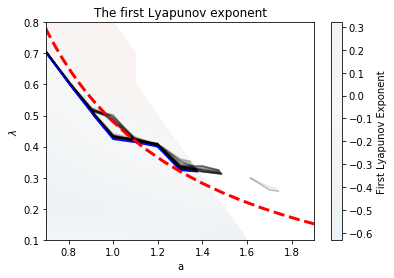

In [8]:
lyapunov_1 = system.plot_Lyapunov_1(figname = 'first_lyapunov')

H:\chaos\modules\lyapunov.py:212: RuntimeWarning: All-NaN slice encountered
  plt.contourf(a[0,0,:,:],l[0,0,:,:],np.nanmax(np.nanmax(lyapunov_2, axis=0), axis=0), levels = 100, cmap = 'RdBu_r', norm=divnorm)
H:\chaos\modules\lyapunov.py:214: RuntimeWarning: All-NaN slice encountered
  


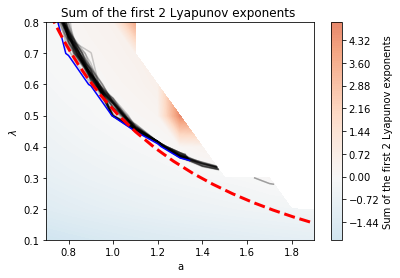

In [9]:
lyapunov_2 = system.plot_Lyapunov_2(figname = 'sum_of_first_two_lyapunov')

In [ ]:
chaos = np.loadtxt('data/chaos_al.dat')

wild_chaos = np.loadtxt('data/wildchaos_al.dat')

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(chaos[:,0],chaos[:,1], label='Homoclinic Bifurcation')
plt.plot(wild_chaos[:,0],wild_chaos[:,1],label = 'Critical Tangency Bifurcation')
plt.plot(lyapunov_1[:,0],lyapunov_1[:,1], label = 'Where largest Lyapunov Exponent = 0')
plt.plot(lyapunov_2[:,0],lyapunov_2[:,1], label = 'Sum of First Two exponents = 0')

ax.set_ylim([l.min(),l.max()])
ax.set_xlim([a.min(),a.max()])
plt.title('Phase Space')
plt.xlabel('a')
plt.ylabel('$\lambda$')
ax.legend(loc='center left', bbox_to_anchor= (0.00, -0.21), ncol=2, 
            borderaxespad=0, frameon=False)
plt.savefig('images/important_points.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import scipy.io

# scipy.io.savemat('data/first_lyapunov.mat', dict(a=lyapunov_1[:,0], l=lyapunov_1[:,1]))
# scipy.io.savemat('data/sum_of_first_two_lyapunov.mat', dict(a=lyapunov_2[:,0], l=lyapunov_2[:,1]))

# np.savetxt('data/first_lyapunov.dat', lyapunov_1, delimiter='   ')
# np.savetxt('data/sum_of_first_two_lyapunov.dat', lyapunov_2, delimiter='   ')

import pandas as pd
df_1 = pd.DataFrame(lyapunov_1)  
df_1.to_csv('data/first_lyapunov.dat', header=False, index = False)
df_2 = pd.DataFrame(lyapunov_2)  
df_2.to_csv('data/sum_of_first_two_lyapunov.dat', header=False, index = False)